In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as mplstyle

import seaborn as sns

import glob


In [ ]:
plt.style.use('default')
sns.set_theme(context='paper', style='white', palette='viridis', font='serif',
            font_scale=2, color_codes=True, rc={'text.usetex' : True})
mplstyle.use('fast')

In [ ]:
DATA_PATH = "../../output/"

# DATA_DIR = "Homo_sine_no_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_no_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Homo_sine_loss_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_loss_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Homo_sine_weight_strat__no_bias_5_5_1000_200_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_weight_strat__no_bias_5_5_1000_200_0.0001_runs_50"


In [ ]:
# DATA_DIR = "Homo_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_no_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Homo_sine_loss_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_loss_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Homo_sine_weight_strat__no_bias_5_5_1000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_sine_weight_strat__no_bias_5_5_1000_50_0.0001_runs_50"

In [ ]:
# DATA_DIR = "Homo_poly_no_strat__no_bias_10_10_3000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_poly_no_strat__no_bias_10_10_3000_50_0.0001_runs_50"
# DATA_DIR = "Homo_poly_loss_strat__no_bias_10_10_3000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_poly_loss_strat__no_bias_10_10_3000_50_0.0001_runs_50"
DATA_DIR = "Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50"
# DATA_DIR = "Hetero_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50"

In [ ]:
run_dirs = glob.glob(DATA_PATH+ DATA_DIR + "/run_*")

In [ ]:
run_dirs

['../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_39',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_12',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_19',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_24',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_29',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_38',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_23',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_28',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_42',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_6',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.0001_runs_50/run_48',
 '../../output/Homo_poly_weight_strat__no_bias_10_10_3000_50_0.000

In [ ]:
neuron_history = [np.loadtxt(run_dir + "/neurons.txt") for run_dir in run_dirs]

In [ ]:
neuron_history[0]

array([21., 21., 21., ..., 56., 56., 56.])

In [ ]:
first_removal_history = []
for neurons in neuron_history:
    diff = np.diff(neurons)
    try:
        index = np.where(diff < 0)[0][0] + 1
    except IndexError:
        index = np.nan
    first_removal_history.append(index)


In [ ]:
non_removal_density = np.isnan(first_removal_history).sum()/len(first_removal_history)

In [ ]:
non_removal_density

0.04

Text(0.5, 1.0, 'first neuron removal epoch')

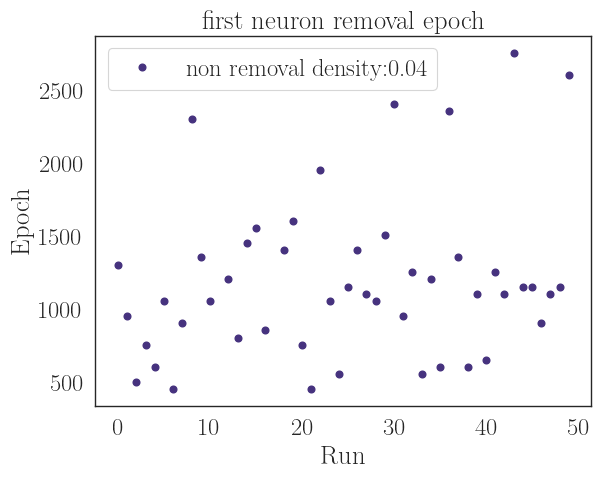

In [ ]:
plt.plot(first_removal_history, "o", label=f"non removal density:{non_removal_density}")
plt.ylabel("Epoch")
plt.xlabel("Run")
plt.legend()
plt.title("first neuron removal epoch")


In [ ]:
# First removal histogram
removal_history = np.loadtxt(DATA_PATH + DATA_DIR + "/first_removal_history.txt")
epochs, n_neurons, losses = removal_history.T

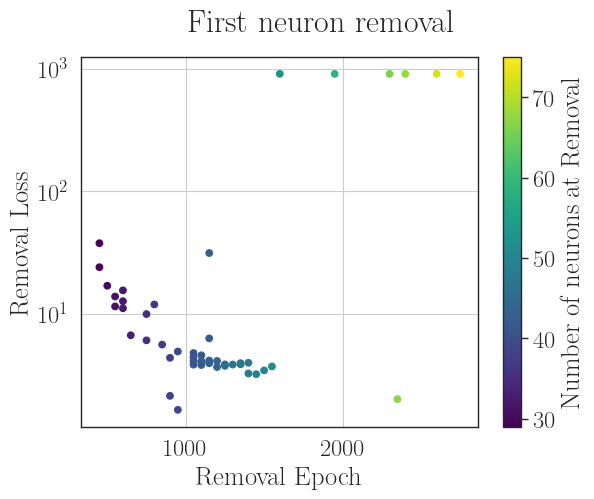

In [ ]:
# fig = plt.figure(figsize=(10, 10))
plt.scatter(epochs, losses, c=n_neurons, cmap='viridis')
plt.xlabel('Removal Epoch')
plt.ylabel('Removal Loss')
plt.colorbar(label='Number of neurons at Removal')
plt.yscale('log')
plt.grid()
plt.suptitle('First neuron removal')
plt.show()

In [ ]:
from scipy import stats 

first_removal_mode = stats.mode(first_removal_history, nan_policy= "omit")

In [ ]:
first_removal_mode

ModeResult(mode=1050.0, count=4)

In [ ]:
loss_history = [np.loadtxt(run_dir + "/loss.txt") for run_dir in run_dirs]

In [ ]:
y_pred_history = [np.loadtxt(run_dir + "/y_pred.txt") for run_dir in run_dirs]
y_pred_mean = np.mean(y_pred_history, axis = 0)
y_pred_std = np.std(y_pred_history, axis = 0)

In [ ]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

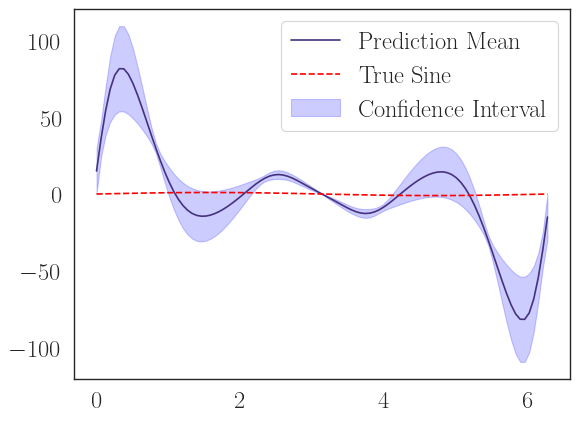

In [ ]:
plt.plot(x, y_pred_mean, label='Prediction Mean')
plt.plot(x, y, 'r--' ,label='True Sine')
plt.fill_between(x, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='blue', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

In [ ]:
def poly(x):
    return (x - 3)*(x - 2)*(x - 1)*x*(x + 1)*(x + 2)*(x + 3)

In [ ]:
x = np.linspace(-3, 3, 100)
y = poly(x)

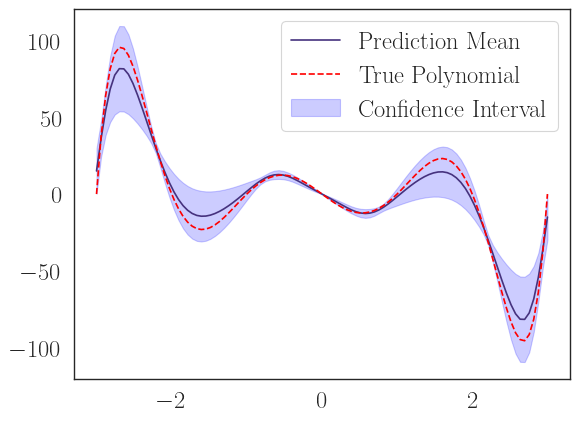

In [ ]:
plt.plot(x, y_pred_mean, label='Prediction Mean')
plt.plot(x, y, 'r--' ,label='True Polynomial')
plt.fill_between(x, y_pred_mean - y_pred_std, y_pred_mean + y_pred_std, color='blue', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()

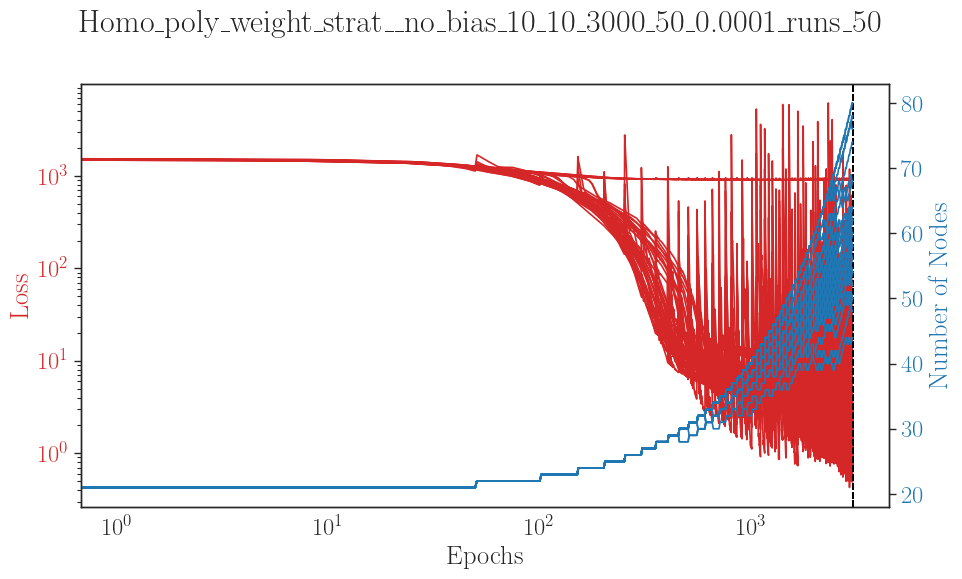

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

loss_color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=loss_color)
ax1.tick_params(axis='y', labelcolor=loss_color)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

for losses, neurons in zip(loss_history, neuron_history):
    num_epochs = len(losses)
    ax1.plot(np.arange(0,num_epochs), losses, "-", color=loss_color)
    ax2.plot(np.arange(0,num_epochs), neurons, "-", color=neuron_color)
    ax1.axvline(num_epochs, 0, 1, color="black", linestyle="--")


plt.suptitle(DATA_DIR)
fig.tight_layout()

In [ ]:
final_shape = [np.loadtxt(run_dir + "/final_shape.txt") for run_dir in run_dirs]
final_adjacency_matrix = [np.loadtxt(run_dir + "/final_adjacency_matrix.txt") for run_dir in run_dirs]

In [ ]:
adj = final_adjacency_matrix[0]
shape = final_shape[0].astype(int)

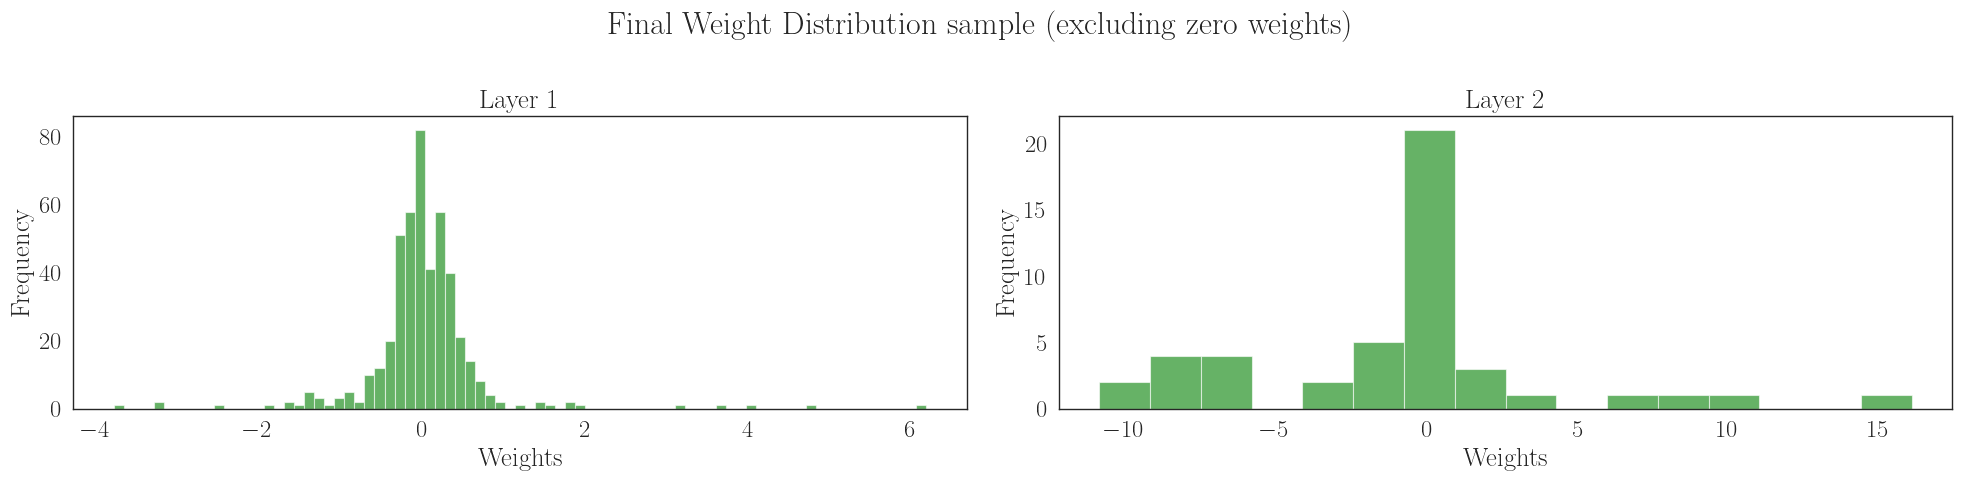

In [ ]:
sub_matrices = np.split(adj, np.cumsum(shape)[:-1])[:-1]

fig, axs = plt.subplots(1, len(sub_matrices), figsize=(20, 5))

for i, (sub_matrix, ax) in enumerate(zip(sub_matrices, axs), start=1):
    weights = sub_matrix.flatten()
    weights = weights[weights != 0]
    ax.hist(weights, bins="auto", density=False, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution sample (excluding zero weights)')
plt.tight_layout()
plt.show()

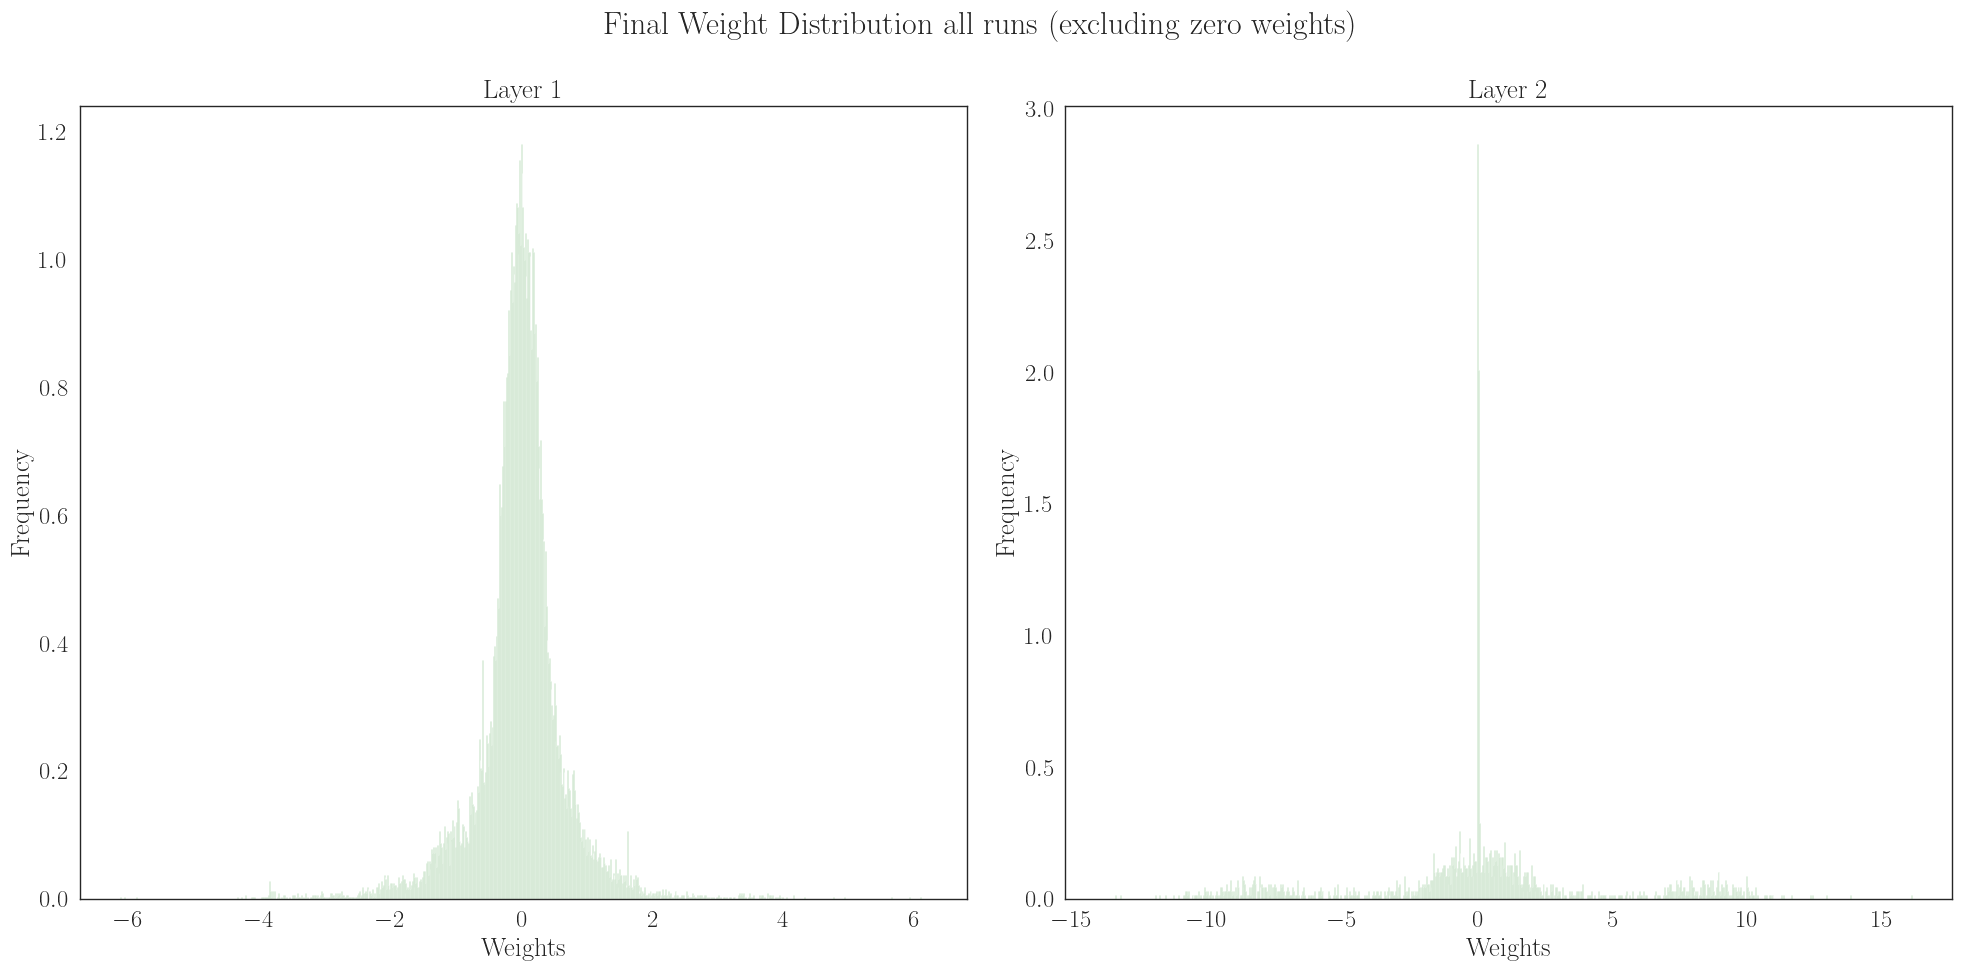

In [ ]:
weights_by_layer = []

# For each adjacency matrix and its corresponding layer sizes
for adjacency_matrix, layer_sizes in zip(final_adjacency_matrix, final_shape):
    shape = layer_sizes.astype(int)
    # Split the adjacency matrix into sub-matrices
    sub_matrices = np.split(adjacency_matrix, np.cumsum(shape)[:-1])[:-1]

    # For each sub-matrix, add its flattened weights to the corresponding sublist in weights_by_layer
    for i, sub_matrix in enumerate(sub_matrices):
        # Flatten the sub-matrix and filter out the zeros
        weights = sub_matrix.flatten()
        weights = weights[weights != 0]

        if i >= len(weights_by_layer):
            # If the sublist does not exist yet, create it
            weights_by_layer.append(list(weights))
        else:
            # If the sublist already exists, append to it
            weights_by_layer[i].extend(weights)


# For each sublist in weights_by_layer, plot a histogram of the weights
fig, axs = plt.subplots(1, len(weights_by_layer), figsize=(20, 10))
for i, (weights, ax) in enumerate(zip(weights_by_layer, axs), start=1):
    ax.hist(weights, bins="auto", density=True, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution all runs (excluding zero weights)')
plt.tight_layout()
plt.show()

In [ ]:
weights_by_layer

[[-0.4565714598793179,
  -0.11592910542331934,
  -0.084537176216123,
  -0.3112423595430527,
  -0.2786919146420487,
  0.6491560183724759,
  0.7102022646378967,
  -0.4767744967667026,
  -0.6144929331445853,
  0.5677827731991286,
  0.5351362642141285,
  -0.18524972010626703,
  -0.035075589023174675,
  -1.671043297396587,
  0.7024661272599756,
  0.7040709877565974,
  -0.22524202932571022,
  0.012116095283450479,
  -0.21203504387874547,
  -0.061363615172784665,
  -0.34469355358133696,
  -0.047339715251710546,
  0.10844891593680661,
  0.03277950255538733,
  0.23059828614210154,
  -0.24818971426058212,
  -0.0497455954594517,
  0.20076065392540535,
  0.10793187346886848,
  0.3574184159999001,
  0.230609362053276,
  0.03414834050790727,
  0.01297621070532433,
  -0.4092083023845966,
  -0.2811233953975047,
  -0.21824596621371806,
  0.29290480425427845,
  0.3936712313330231,
  -0.2962757661607777,
  -0.14918845101531308,
  -0.181737968608775,
  -0.08101711558791608,
  -0.00031997232593175296,
  -0